In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import acquire as ac
import prepare as pr

from scipy import stats

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

seed = 42

In [2]:
df = ac.wine_data()

In [3]:
df = pr.get_bins(df)
dfs = pr.get_bins(df)

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,average


# dummies

In [5]:
dfs = pr.get_dummies(df)

# split

In [6]:
train,validate,test = pr.split_data(df,'quality')

(3637, 14) (1560, 14) (1300, 14)


In [7]:
trains,validates,tests = pr.split_data(dfs,'quality')

(3637, 15) (1560, 15) (1300, 15)


In [8]:
x_trains, y_train, x_validates, y_validate, x_tests, y_test = pr.x_and_y(trains,validate,tests,'quality')

# scaled Data

In [9]:
num_cols = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar', 'chlorides', 'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']

In [10]:
x_trains, x_validates, x_tests = pr.scaled_data(x_trains,x_validates, x_tests, num_cols)

In [11]:
x_trains

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type_white,quality_bin_good,quality_bin_poor
542,0.447368,0.547414,0.195122,0.045307,0.096828,0.013889,0.032258,0.406412,0.310078,0.200000,0.306452,0,0,0
1484,0.228070,0.715517,0.048780,0.042071,0.080134,0.010417,0.011521,0.376950,0.627907,0.229412,0.467742,0,0,1
2641,0.166667,0.060345,0.284553,0.488673,0.050083,0.187500,0.350230,0.398614,0.403101,0.070588,0.419355,1,0,0
2005,0.245614,0.172414,0.268293,0.449838,0.051753,0.159722,0.373272,0.527730,0.480620,0.247059,0.129032,1,0,0
3121,0.298246,0.129310,0.276423,0.029126,0.051753,0.079861,0.283410,0.252600,0.310078,0.264706,0.387097,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,0.201754,0.181034,0.203252,0.058252,0.217028,0.024306,0.241935,0.237435,0.217054,0.111765,0.306452,1,0,1
4233,0.184211,0.129310,0.268293,0.200647,0.066778,0.076389,0.258065,0.285095,0.395349,0.123529,0.387097,1,0,0
4718,0.087719,0.137931,0.121951,0.207120,0.051753,0.107639,0.294931,0.284229,0.403101,0.135294,0.306452,1,0,0
3513,0.324561,0.232759,0.227642,0.394822,0.033389,0.041667,0.131336,0.259099,0.209302,0.105882,0.806452,1,0,0


# import

In [12]:
# df['quality_bin'] = df.quality

In [13]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,average
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,average
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,average
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,good


In [14]:
wines = ac.wine_data()

In [15]:
wines.shape

(6497, 13)

In [16]:
wines.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [17]:
wines.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [18]:
wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [19]:
name_dict = {'fixed acidity':'fixed_acidity', 'volatile acidity': 'volatile_acidity','citric acid':'citric_acid',
             'residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}



In [20]:
wines.rename(columns = name_dict,
             inplace = True)

In [21]:
wines['free_sulfur_dioxide'] = wines.free_sulfur_dioxide.astype(int)

In [22]:
wines['total_sulfur_dioxide'] = wines.total_sulfur_dioxide.astype(int)

In [23]:
wines.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide       int64
total_sulfur_dioxide      int64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [24]:
num_cols = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar', 'chlorides', 'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']

In [25]:
num_cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

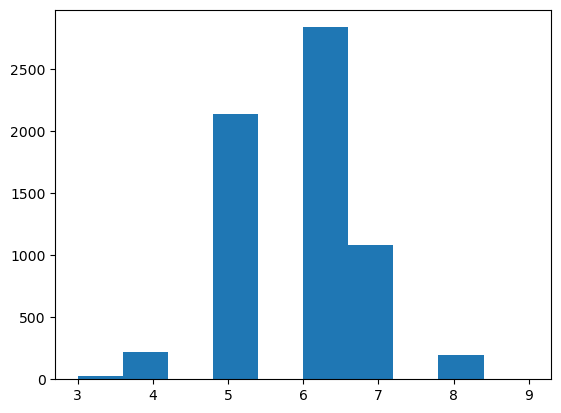

In [26]:
plt.hist(data = wines, x = 'quality')

In [27]:
num_cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

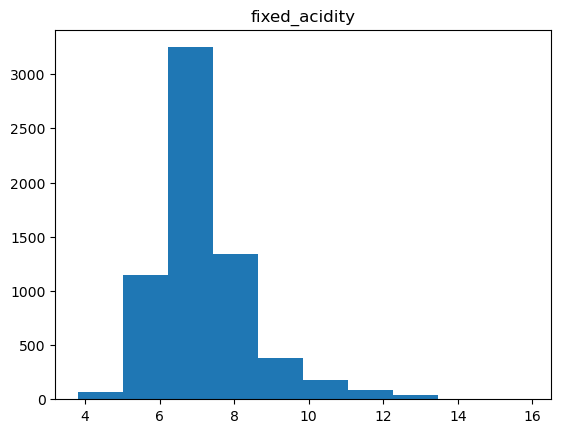

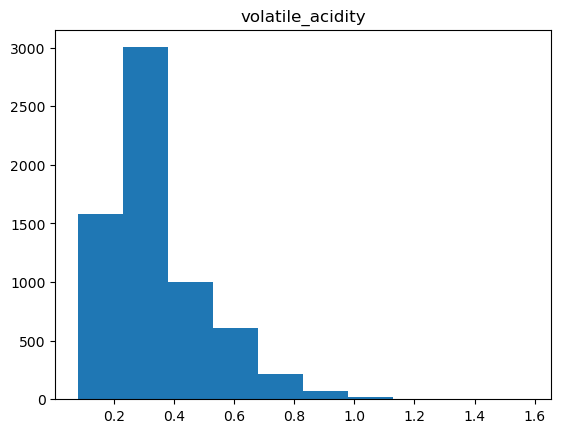

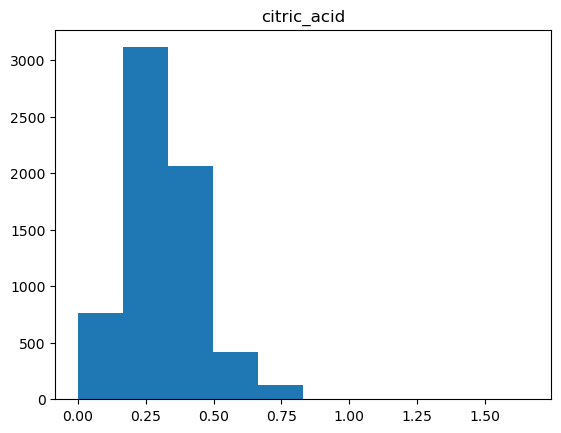

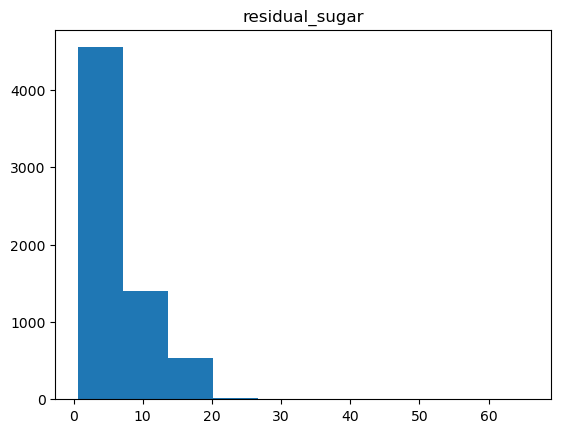

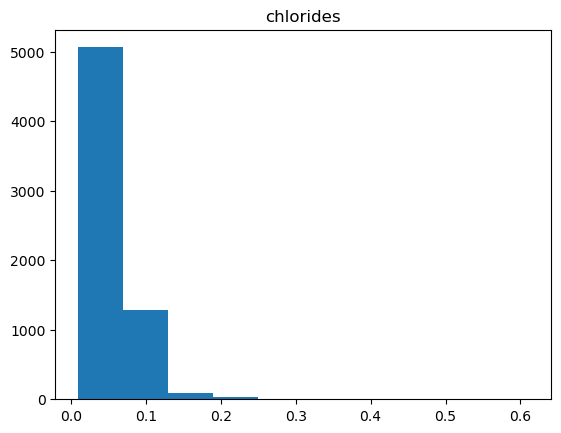

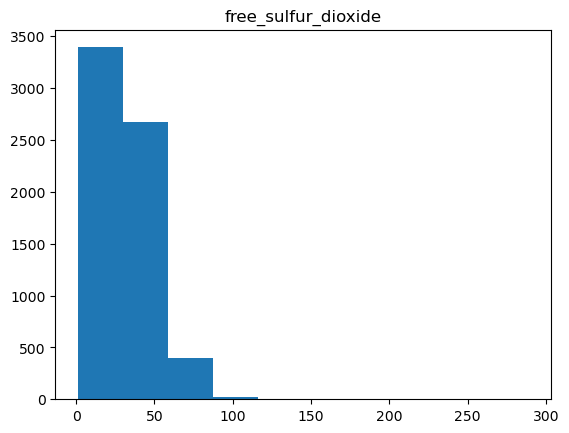

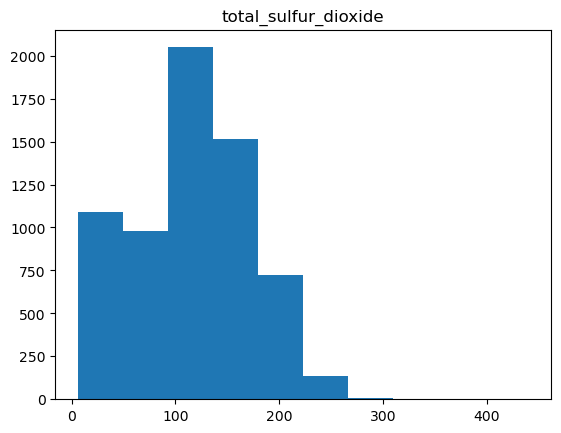

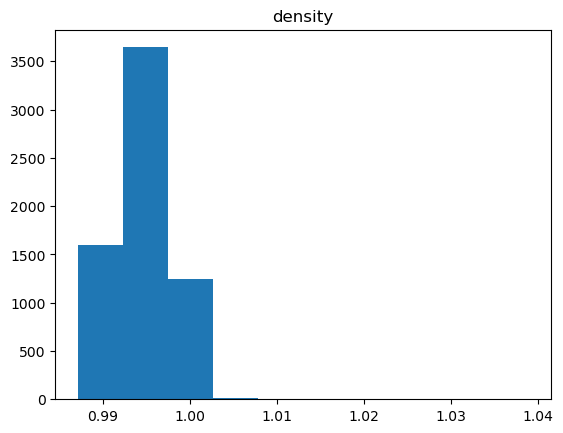

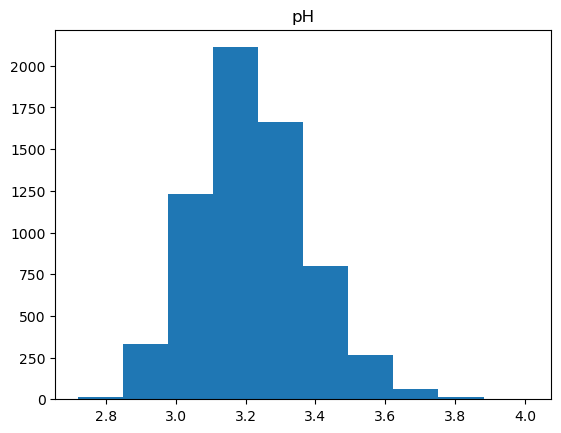

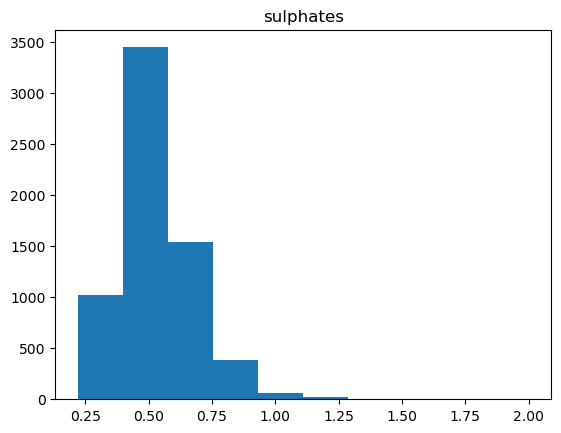

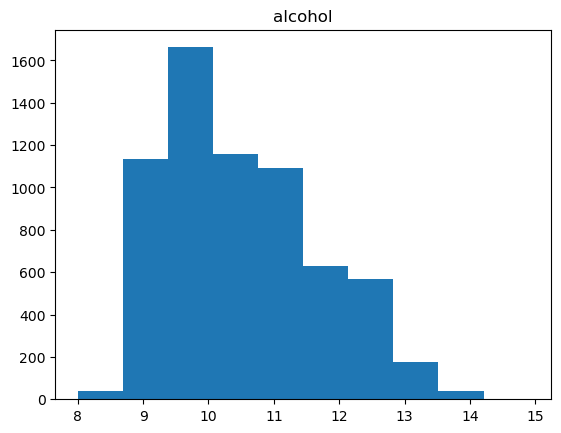

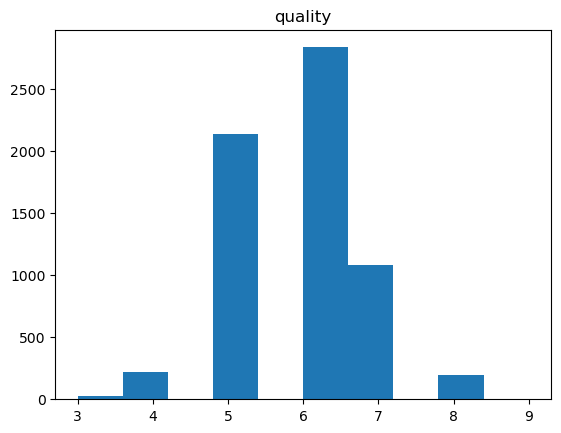

In [28]:
for col in wines[num_cols]:

    plt.hist(data = wines , x = col )
    plt.title(col)

    plt.show()

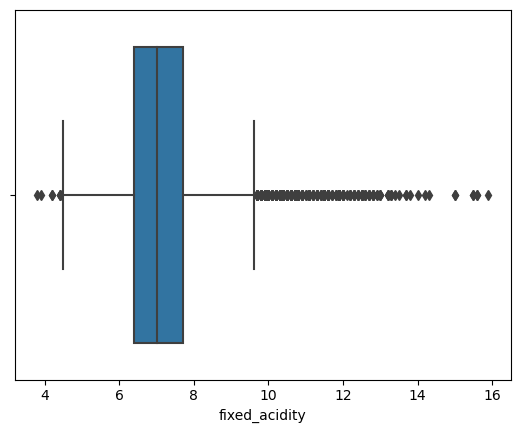

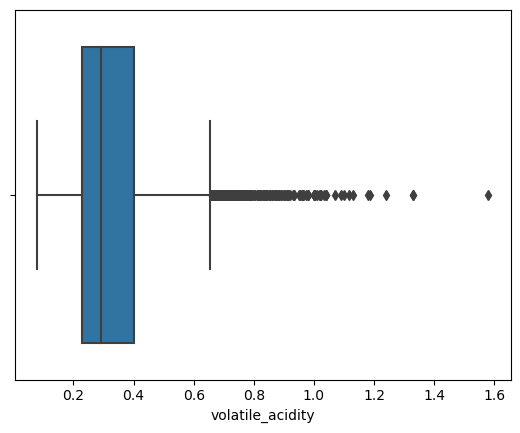

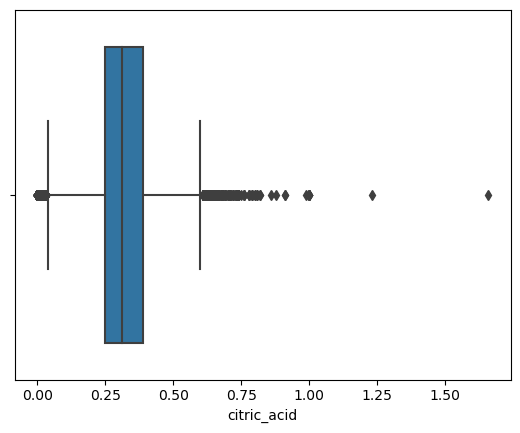

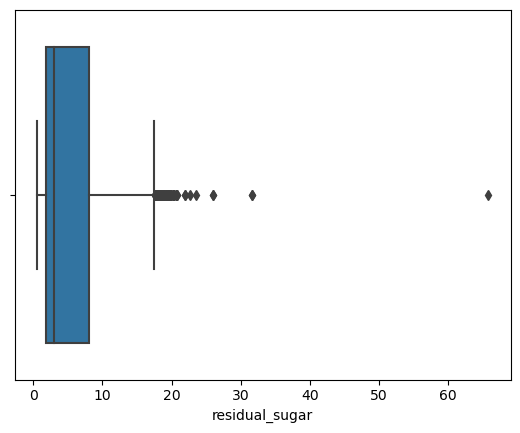

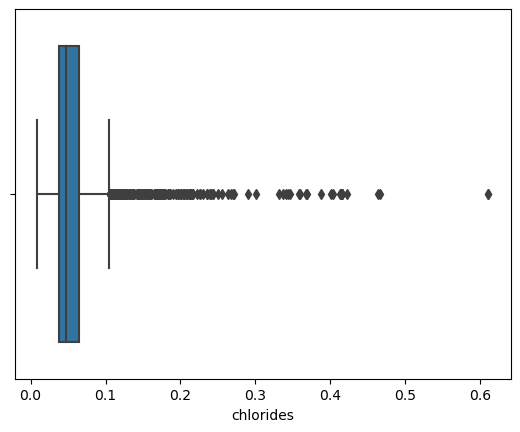

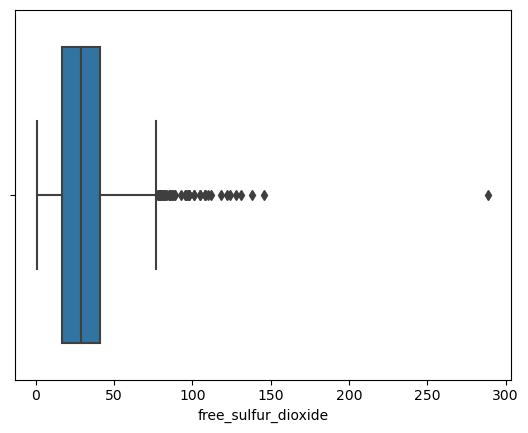

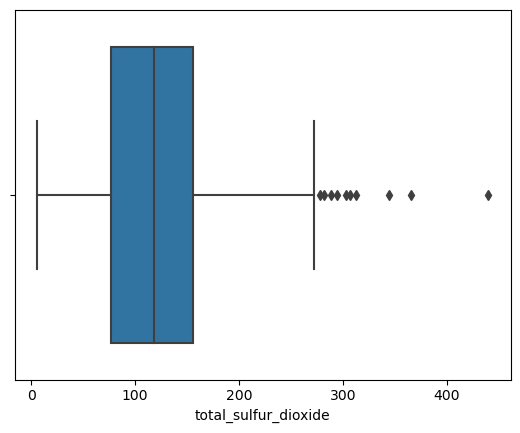

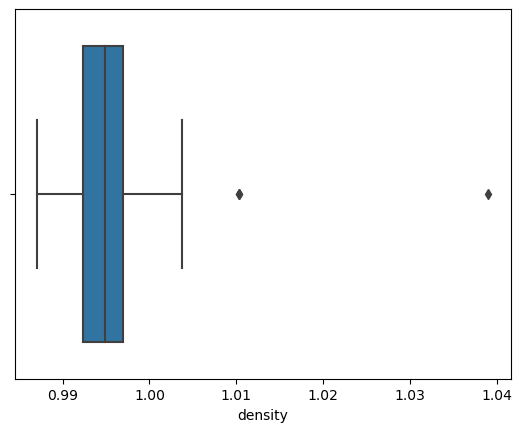

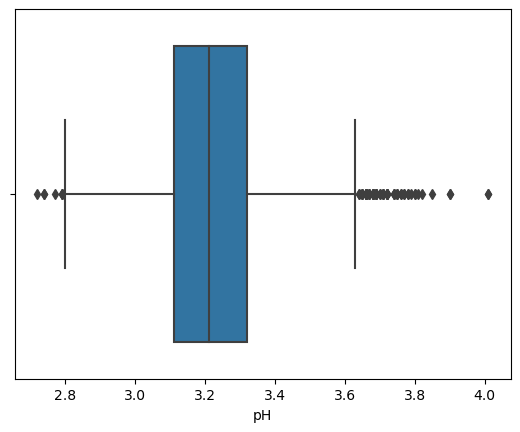

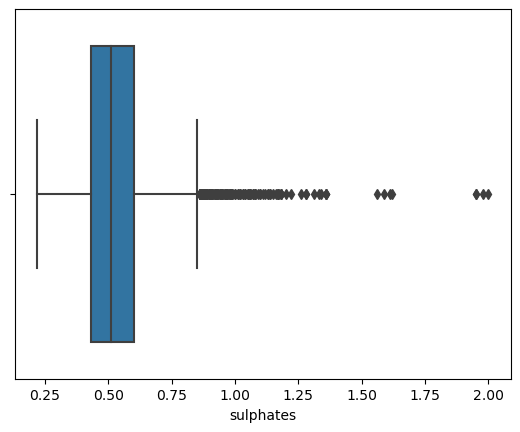

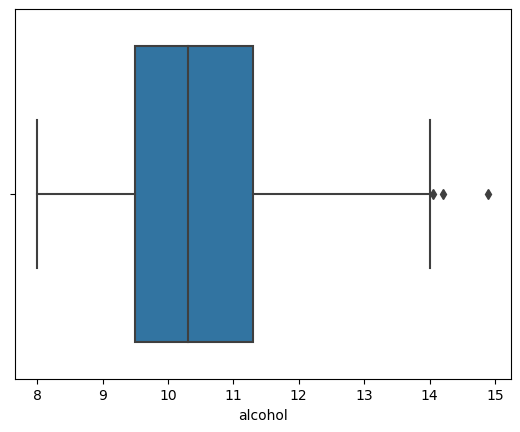

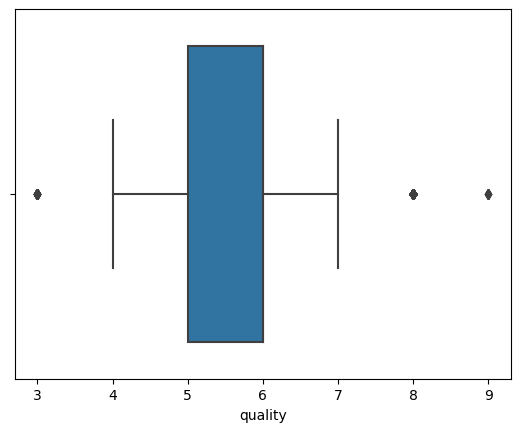

In [29]:
for col in wines[num_cols]:

    sns.boxplot(data = wines , x = col )

    plt.show()

In [30]:
wineheat = wines.corr()

<AxesSubplot:>

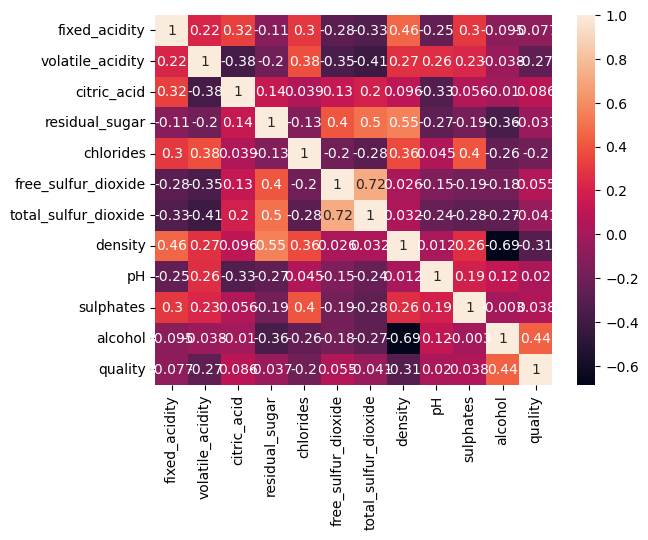

In [31]:
sns.heatmap(wineheat,annot= True)


In [32]:
wineunstack = wineheat.unstack()

In [33]:
wineunstack = pd.DataFrame(wineunstack)

In [34]:
wineunstack

0
fixed_acidity fixed_acidity     1.000000
              volatile_acidity  0.219008
              citric_acid       0.324436
              residual_sugar   -0.111981
              chlorides         0.298195
...                                  ...
quality       density          -0.305858
              pH                0.019506
              sulphates         0.038485
              alcohol           0.444319
              quality           1.000000

[144 rows x 1 columns]

In [35]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(wineunstack)

                                                  0
fixed_acidity        fixed_acidity         1.000000
                     volatile_acidity      0.219008
                     citric_acid           0.324436
                     residual_sugar       -0.111981
                     chlorides             0.298195
                     free_sulfur_dioxide  -0.282815
                     total_sulfur_dioxide -0.329064
                     density               0.458910
                     pH                   -0.252700
                     sulphates             0.299568
                     alcohol              -0.095452
                     quality              -0.076743
volatile_acidity     fixed_acidity         0.219008
                     volatile_acidity      1.000000
                     citric_acid          -0.377981
                     residual_sugar       -0.196011
                     chlorides             0.377124
                     free_sulfur_dioxide  -0.352580
            

In [36]:
# fixed-acidity = density = .45


In [37]:
# volatile-acidity = citric-acid -.37
# volatile-acidity = chlorides .37
# volatile-acidity = free-sulfur-dio = -.35
# volatile-acidity = total-sulfur-dio = -.41

In [38]:
# citric-acid = volatile_acidity   = -.37

In [39]:
# residual-sugar = free_sulfur = .40
# residual-sugar = total_sulfur = .49
# residual-sugar = density = .55
# residual-sugar = alcohol = .35



In [40]:
# chlorides = volatile_acidity   = -.37
# chlorides = sulphate = .39
# chlorides = residual = .40

In [41]:
# free-sulfur = density = .36
# free-sulfur =  total_sulfur = .72
# free-sulfur =  total_sulfur = .72


In [42]:
# alchol and density .-68
# alchol and ph .12


# chlorides = volatile_acidity   = -.37
# chlorides = sulphate = .39
# chlorides = residual = .40

# volatile-acidity = citric-acid -.37
# volatile-acidity = chlorides .37
# volatile-acidity = free-sulfur-dio = -.35
# volatile-acidity = total-sulfur-dio = -.41

# density = fixed acid = 45
# density = residual sugar  = 55






In [43]:
df = ac.wine_data()

In [44]:
dfs = df.copy()

# get dummies

In [45]:
dfs = pd.get_dummies(data = dfs, columns= ['type'], drop_first= True)

# num_cols

In [46]:
num_cols = df.loc[:, ~df.columns.isin(['type', 'quality'])].columns.tolist()

# cluster

In [47]:
x_trains

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type_white,quality_bin_good,quality_bin_poor
542,0.447368,0.547414,0.195122,0.045307,0.096828,0.013889,0.032258,0.406412,0.310078,0.200000,0.306452,0,0,0
1484,0.228070,0.715517,0.048780,0.042071,0.080134,0.010417,0.011521,0.376950,0.627907,0.229412,0.467742,0,0,1
2641,0.166667,0.060345,0.284553,0.488673,0.050083,0.187500,0.350230,0.398614,0.403101,0.070588,0.419355,1,0,0
2005,0.245614,0.172414,0.268293,0.449838,0.051753,0.159722,0.373272,0.527730,0.480620,0.247059,0.129032,1,0,0
3121,0.298246,0.129310,0.276423,0.029126,0.051753,0.079861,0.283410,0.252600,0.310078,0.264706,0.387097,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,0.201754,0.181034,0.203252,0.058252,0.217028,0.024306,0.241935,0.237435,0.217054,0.111765,0.306452,1,0,1
4233,0.184211,0.129310,0.268293,0.200647,0.066778,0.076389,0.258065,0.285095,0.395349,0.123529,0.387097,1,0,0
4718,0.087719,0.137931,0.121951,0.207120,0.051753,0.107639,0.294931,0.284229,0.403101,0.135294,0.306452,1,0,0
3513,0.324561,0.232759,0.227642,0.394822,0.033389,0.041667,0.131336,0.259099,0.209302,0.105882,0.806452,1,0,0


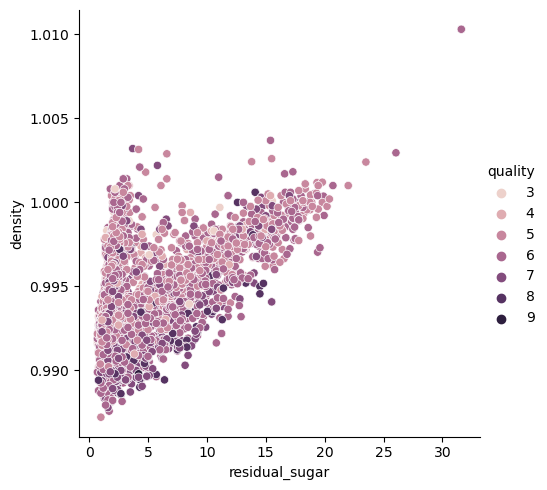

In [48]:
sns.relplot(data = train, x = 'residual_sugar', y = 'density', hue = 'quality' )

# clustering

In [49]:
def cluster_data(train, validate,test, k, cluster_col_name = 'cluster'):
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train)
    
    train_clusters = kmeans.predict(train)
    validate_clusters = kmeans.predict(validate)
    test_clusters = kmeans.predict(test)
    
 
        
    return train_clusters, validate_clusters, test_clusters
        

# --------------------------------------------------------------------------------------

In [50]:
def pearson_test(df, feat1,feat2):
    
    # running the test
    r, p = stats.pearsonr(df[feat1], df[feat2])
    
    print(f'p is {p:.10f}, {r}') 
   

    if p < .05:
        print('The pearson r test shows that there is a signficant relationship.')
    else: 
        print('The relationship is not significant')
    

# is the relationship between alcohol and quality?

In [51]:
pearson_test(train,'alcohol','quality')

p is 0.0000000000, 0.44192102278310486
The pearson r test shows that there is a signficant relationship.


## .44 positive correlation

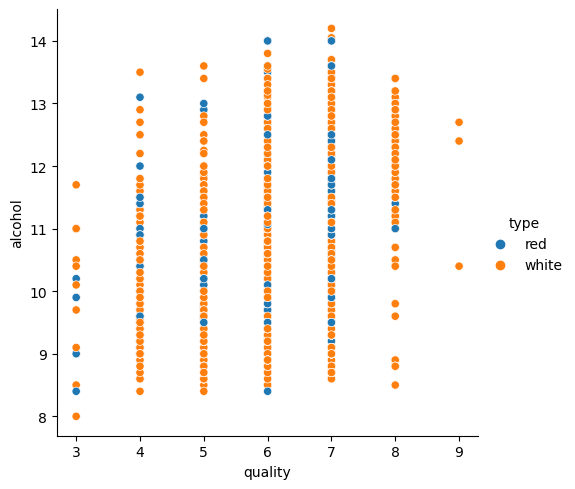

In [52]:
sns.relplot(data = train, x = 'quality', y = 'alcohol',hue = 'type')

## is the relationship between alcohol and density significant?

In [53]:
pearson_test(train, 'alcohol','density')

p is 0.0000000000, -0.7042240941033904
The pearson r test shows that there is a signficant relationship.


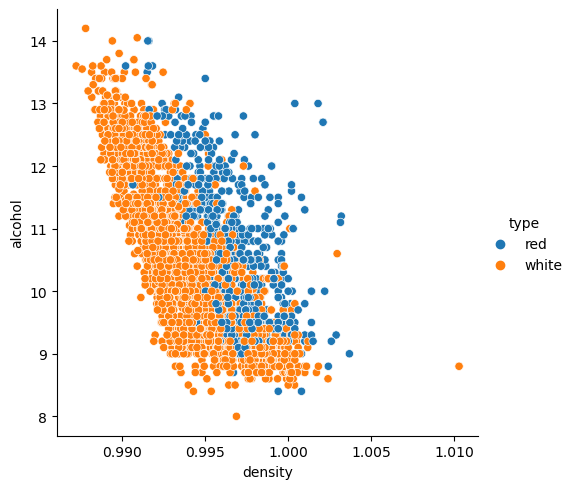

In [54]:
sns.relplot(data = train, x = 'density', y = 'alcohol',hue = 'type')
plt.show()

In [55]:
talc = x_trains[['alcohol','density']]
valc = x_validates[['alcohol','density']]
tealc = x_tests[['alcohol','density']]

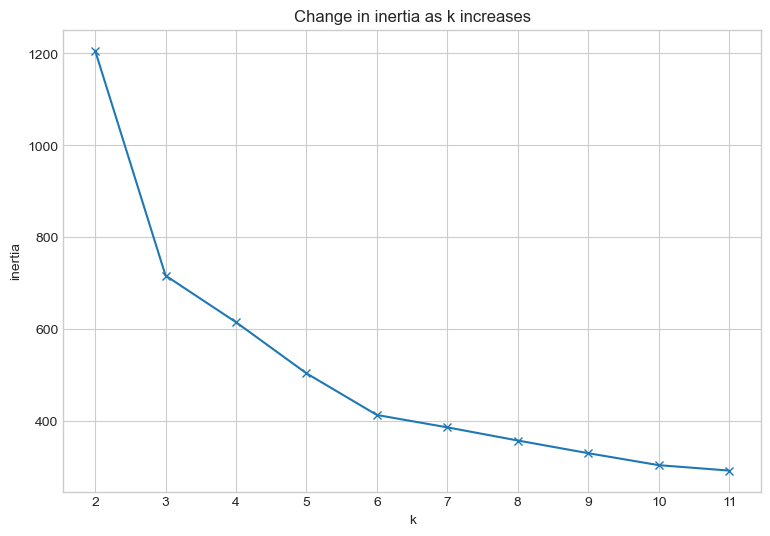

In [56]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(x_trains).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    plt.show()

In [57]:
x_trains['alc_den'],x_validates['alc_den'],x_tests['alc_den'] = cluster_data(talc,valc,tealc,3, cluster_col_name = 'alc_den')

## is the relationship between alcohol and density significant?

In [58]:
pearson_test(train, 'volatile_acidity','alcohol')

p is 0.0617157865, -0.03098328630465113
The relationship is not significant


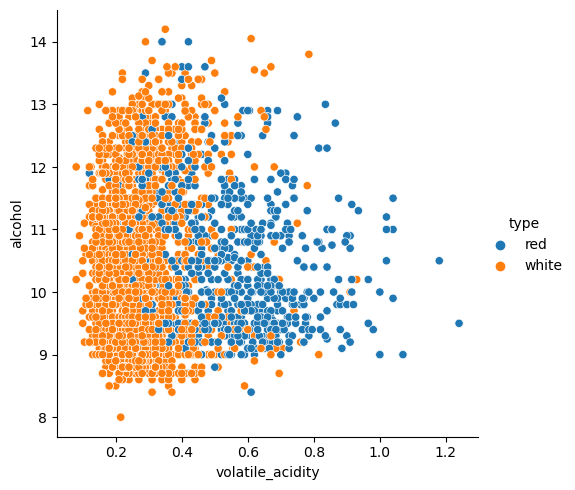

In [59]:
sns.relplot(data = train, x = 'volatile_acidity', y = 'alcohol',hue = 'type')

# is the relationship between quality and density significant

In [60]:
pearson_test(train, 'density','quality')

p is 0.0000000000, -0.31002127979856325
The pearson r test shows that there is a signficant relationship.


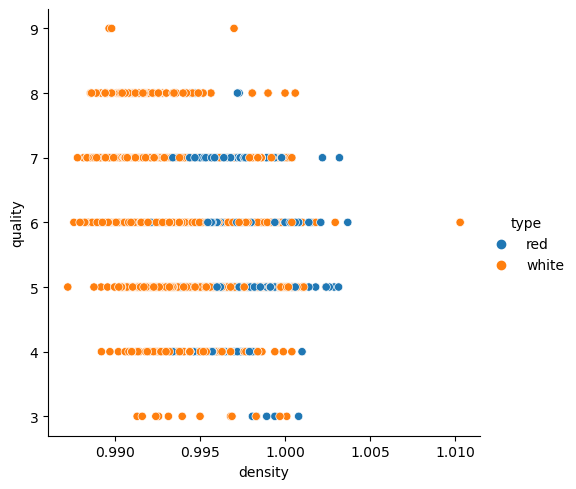

In [61]:
sns.relplot(data = train, x = 'density', y = 'quality',hue = 'type')

## is there a significant relationship between density and residual sugar

In [62]:
pearson_test(train, 'residual_sugar','density')

p is 0.0000000000, 0.5522098359859968
The pearson r test shows that there is a signficant relationship.


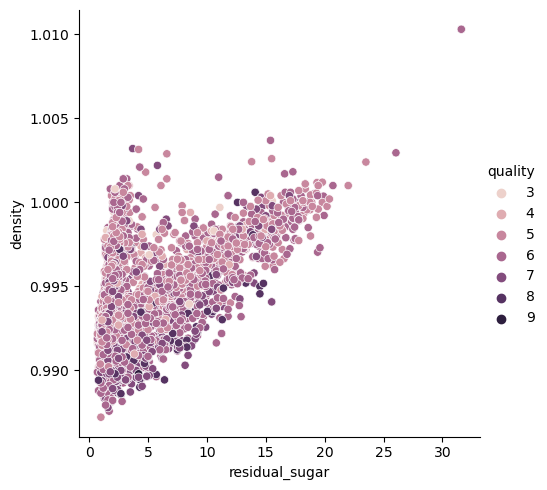

In [63]:
sns.relplot(data = train, x = 'residual_sugar', y = 'density',hue = 'quality')

In [64]:
tres = x_trains[['residual_sugar','density']]
vres = x_validates[['residual_sugar','density']]
teres = x_tests[['residual_sugar','density']] 

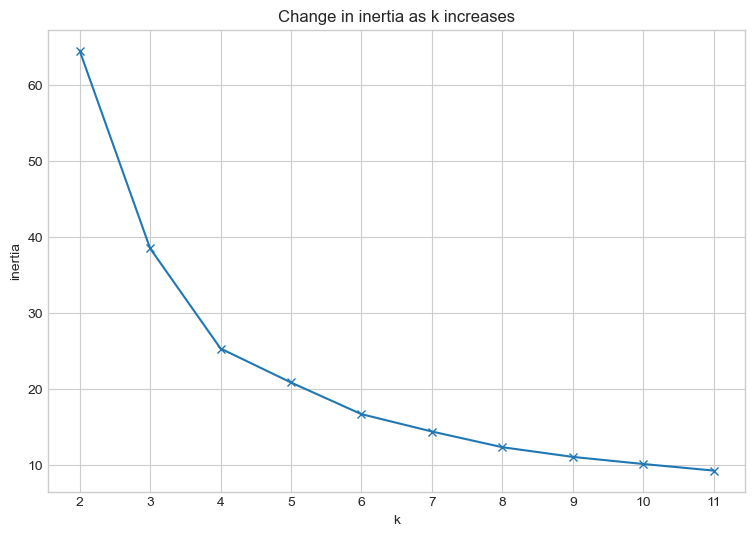

In [65]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(tres).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    plt.show()

In [66]:
x_trains['res_den'],x_validates['res_den'],x_tests['res_den'] = cluster_data(tres,vres,teres,4,cluster_col_name= 'res_den')

In [67]:
x_trains

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type_white,quality_bin_good,quality_bin_poor,alc_den,res_den
542,0.447368,0.547414,0.195122,0.045307,0.096828,0.013889,0.032258,0.406412,0.310078,0.200000,0.306452,0,0,0,0,1
1484,0.228070,0.715517,0.048780,0.042071,0.080134,0.010417,0.011521,0.376950,0.627907,0.229412,0.467742,0,0,1,2,1
2641,0.166667,0.060345,0.284553,0.488673,0.050083,0.187500,0.350230,0.398614,0.403101,0.070588,0.419355,1,0,0,2,3
2005,0.245614,0.172414,0.268293,0.449838,0.051753,0.159722,0.373272,0.527730,0.480620,0.247059,0.129032,1,0,0,0,3
3121,0.298246,0.129310,0.276423,0.029126,0.051753,0.079861,0.283410,0.252600,0.310078,0.264706,0.387097,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,0.201754,0.181034,0.203252,0.058252,0.217028,0.024306,0.241935,0.237435,0.217054,0.111765,0.306452,1,0,1,2,0
4233,0.184211,0.129310,0.268293,0.200647,0.066778,0.076389,0.258065,0.285095,0.395349,0.123529,0.387097,1,0,0,2,2
4718,0.087719,0.137931,0.121951,0.207120,0.051753,0.107639,0.294931,0.284229,0.403101,0.135294,0.306452,1,0,0,2,2
3513,0.324561,0.232759,0.227642,0.394822,0.033389,0.041667,0.131336,0.259099,0.209302,0.105882,0.806452,1,0,0,1,2


<AxesSubplot:xlabel='residual_sugar', ylabel='density'>

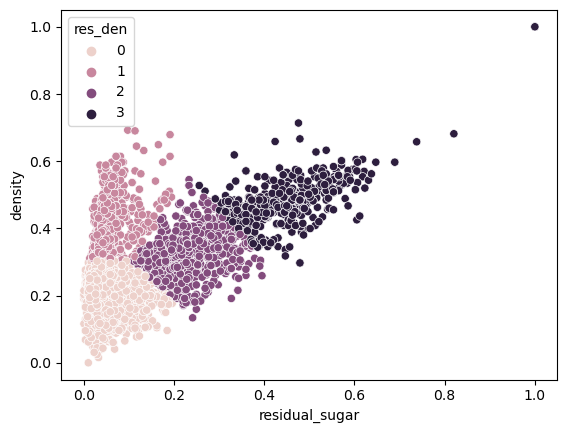

In [68]:
sns.scatterplot(data = x_trains,x ='residual_sugar',y = 'density',hue = 'res_den')

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

# get_dummies for clusters

In [69]:
x_trains = pr.get_dummies(x_trains, ['res_den','alc_den'])
x_validates = pr.get_dummies(x_validates, ['res_den','alc_den'])
x_tests = pr.get_dummies(x_tests, ['res_den','alc_den'])

In [71]:
#

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type_white,quality_bin_good,quality_bin_poor,res_den_1,res_den_2,res_den_3,alc_den_1,alc_den_2
4801,0.192982,0.021552,0.235772,0.012945,0.038397,0.149306,0.308756,0.181976,0.348837,0.176471,0.435484,1,1,0,0,0,0,0,1
1711,0.245614,0.103448,0.243902,0.174757,0.041736,0.104167,0.262673,0.289428,0.403101,0.152941,0.451613,1,0,0,0,1,0,0,1
1483,0.342105,0.215517,0.357724,0.025890,0.050083,0.017361,0.013825,0.355286,0.488372,0.211765,0.435484,0,0,0,1,0,0,0,1
1492,0.175439,0.491379,0.048780,0.029126,0.063439,0.017361,0.027650,0.271231,0.658915,0.170588,0.637097,0,0,0,0,0,0,1,0
3242,0.245614,0.181034,0.284553,0.022654,0.040067,0.142361,0.237327,0.172010,0.457364,0.217647,0.580645,1,0,0,0,0,0,1,0


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type_white,quality_bin_good,quality_bin_poor,res_den_1,res_den_2,res_den_3,alc_den_1,alc_den_2
542,0.447368,0.547414,0.195122,0.045307,0.096828,0.013889,0.032258,0.406412,0.310078,0.200000,0.306452,0,0,0,1,0,0,0,0
1484,0.228070,0.715517,0.048780,0.042071,0.080134,0.010417,0.011521,0.376950,0.627907,0.229412,0.467742,0,0,1,1,0,0,0,1
2641,0.166667,0.060345,0.284553,0.488673,0.050083,0.187500,0.350230,0.398614,0.403101,0.070588,0.419355,1,0,0,0,0,1,0,1
2005,0.245614,0.172414,0.268293,0.449838,0.051753,0.159722,0.373272,0.527730,0.480620,0.247059,0.129032,1,0,0,0,0,1,0,0
3121,0.298246,0.129310,0.276423,0.029126,0.051753,0.079861,0.283410,0.252600,0.310078,0.264706,0.387097,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,0.201754,0.181034,0.203252,0.058252,0.217028,0.024306,0.241935,0.237435,0.217054,0.111765,0.306452,1,0,1,0,0,0,0,1
4233,0.184211,0.129310,0.268293,0.200647,0.066778,0.076389,0.258065,0.285095,0.395349,0.123529,0.387097,1,0,0,0,1,0,0,1
4718,0.087719,0.137931,0.121951,0.207120,0.051753,0.107639,0.294931,0.284229,0.403101,0.135294,0.306452,1,0,0,0,1,0,0,1
3513,0.324561,0.232759,0.227642,0.394822,0.033389,0.041667,0.131336,0.259099,0.209302,0.105882,0.806452,1,0,0,0,1,0,1,0


In [ ]:
def fit_predict_dt(x_train, y_train, x_validate, x_test):
    clf = tree.DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    
    train_pred = clf.predict(x_train)
    train_prob = clf.predict_proba(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    
    validate_pred = clf.predict(x_validate)
    validate_prob = clf.predict_proba(x_validate)
    validate_acc = accuracy_score(y_validate, validate_pred)
    
    test_pred = clf.predict(x_test)
    test_prob = clf.predict_proba(x_test)
    test_acc = accuracy_score(y_test, test_pred)
    
    results = pd.DataFrame({
        'Dataset': ['Train', 'Validate', 'Test'],
        'Accuracy': [train_acc, validate_acc, test_acc]
    })
    
    return results

In [73]:
rf.fit(x_trains,y_train)

NameError: name 'rf' is not defined